In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### 1. Data from video ####

In [65]:
data_file = "/home/ljma/MEOCloud/fis/2024/fslinky/misc/video/v.csv"
vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tv, xv = np.vsplit(vid_data, [1])
tv = tv.reshape(-1)

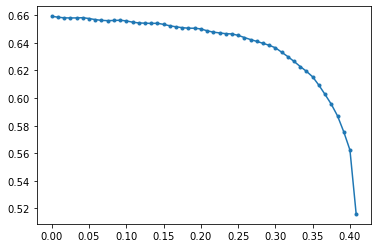

In [69]:
plt.plot(tv, xv[1],'.-');